<a href="https://colab.research.google.com/github/Elvin26/Final-Team4/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_4%ED%8C%80_%EA%B6%8C%EC%A7%80%EC%98%88_%EC%A0%84%EC%B2%98%EB%A6%AC%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# 지역 데이터 전처리

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

geo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_geolocation_dataset.csv")

In [3]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
# 도시 이름을 영어로 표준화 (이것은 플레이스홀더이며, 실제 번역에는 사전이나 API가 필요할 수 있습니다)
# 데모를 위해 간단한 대체 또는 매핑이 필요하다고 가정합니다.
# 실제 시나리오에서는 번역 라이브러리나 사전 정의된 매핑을 사용할 수 있습니다.
# 플레이스홀더로, 컬럼에 함수를 적용하는 방법을 보여드리겠습니다.
# 실제 번역 로직으로 람다 함수를 대체해야 합니다.
geo['geolocation_city'] = geo['geolocation_city'].str.lower() # 일관성을 위해 소문자로 변환

# 중복된 우편번호를 위도와 경도의 평균으로 처리
# 우편번호로 그룹화하고 위도 및 경도의 평균 계산
geo_cleaned = geo.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first', # 소문자 변환 후 첫 번째 도시 이름 유지
    'geolocation_state': 'first' # 첫 번째 주 유지
}).reset_index()

# 정제된 데이터프레임 표시
display(geo_cleaned.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [5]:
# Rename columns to Korean
geo_cleaned.rename(columns={
    'geolocation_zip_code_prefix': '우편번호',
    'geolocation_lat': '위도',
    'geolocation_lng': '경도',
    'geolocation_city': '도시',
    'geolocation_state': '주'
}, inplace=True)

# Display the dataframe with Korean column names
display(geo_cleaned)

,우편번호,위도,경도,도시,주
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP
...,...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua,RS
19011,99965,-28.183372,-52.039850,agua santa,RS
19012,99970,-28.343766,-51.874689,ciriaco,RS
19013,99980,-28.389129,-51.843836,david canabarro,RS


In [6]:
geo_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/final project data/cleaned_geolocation_data.csv', index=False) #지역 처리 데이터 저장

# 카테고리 분석을 위한 데이터 병합

## 필요한 데이터 불러오기 및 병합

In [27]:
orders = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_orders_dataset.csv")
items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_order_items_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_customers_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_sellers_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/olist_products_dataset.csv")
products_eng = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final project data/product_category_name_translation.csv")



In [28]:
#oders와 itmes 병합, 기준 :order_id
df = pd.merge(orders, items, on='order_id', how='inner')

# products 병합, 기준 :product_id
df = pd.merge(df, products, on='product_id', how='inner')

# customers 병합, 기준 :customer_id
df = pd.merge(df, customers, on='customer_id', how='inner')

# sellers 병합, 기준 :seller_id
df = pd.merge(df, sellers, on='seller_id', how='inner')

# products_eng 병합, 기준 :product_category_name
df = pd.merge(df, products_eng, on='product_category_name', how='inner')

#중복된 컬럼 및 데이터 시각화에 필요없는 컬럼 제외
df.drop(['order_status',
         'order_purchase_timestamp',
         'order_approved_at',
         'order_delivered_carrier_date',
         'order_delivered_customer_date',
         'order_estimated_delivery_date',
         'shipping_limit_date',
         'product_name_lenght',
         'product_description_lenght',
         'product_photos_qty',
         'product_weight_g',
         'product_length_cm',
         'product_height_cm',
         'product_width_cm',
         ], axis=1, inplace=True)

# Display the head of the merged DataFrame
display(df.head())
print(df.shape)

,order_id,customer_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery


(111023, 16)


## 카테고리 대분류 정리

In [29]:
# 상품 카테고리별 대분류 기준 매핑 딕셔너리
category_to_main = {
    # 패션
    "fashion_babies_&_accessories": "패션",
    "fashion_accessories": "패션",
    "fashion_collections": "패션",
    "fashion_shoes": "패션",
    "fashion_rings": "패션",
    "fashion_necklaces_bracelets_jewel": "패션",
    "fashion_sunglasses_optical": "패션",
    "fashion_handbags_wallets_prada": "패션",
    "makeup_accessories": "패션",
    "makeup_cosmetics": "패션",
    "perfumes": "패션",

    # 가구/인테리어
    "cremas_cosmetica": "가구/인테리어",
    "cremas": "가구/인테리어",
    "decoracion": "가구/인테리어",
    "muebles": "가구/인테리어",
    "muebles_decoracion": "가구/인테리어",
    "muebles_quarto": "가구/인테리어",
    "muebles_sala": "가구/인테리어",

    # 가전/전자
    "audio": "가전/전자",
    "ceramicas_ferramentas_luminarias": "가전/전자",
    "electrodomesticos": "가전/전자",
    "electrodomesticos_2": "가전/전자",
    "informatica": "가전/전자",
    "informatica_comunicacion": "가전/전자",
    "tv_video": "가전/전자",
    "portatil_casa_home_cafe": "가전/전자",
    "portateis_casa_home_cafe": "가전/전자",
    "portateis_cozinha_pequenos_domesticos": "가전/전자",
    "telefonos_imagem": "가전/전자",
    "telefonia": "가전/전자",

    # 생활용품
    "bebe": "생활용품",
    "banos": "생활용품",
    "higiene": "생활용품",
    "padaria": "생활용품",
    "panificadora": "생활용품",
    "petshop": "생활용품",
    "produtos_domesticos": "생활용품",

    # 스포츠/레저
    "artes_artesanato": "스포츠/레저",
    "brinquedos": "스포츠/레저",
    "camping": "스포츠/레저",
    "esporte": "스포츠/레저",
    "games_consoles": "스포츠/레저",
    "jardim": "스포츠/레저",
    "moda_festa": "스포츠/레저",
    "moda_praia": "스포츠/레저",

    # 서적/DVD
    "cds_dvds_musicais": "서적/DVD",
    "livros": "서적/DVD",
    "livros_literatura_geral": "서적/DVD",
    "livros_tecnicos": "서적/DVD",

    # 완구/취미
    "alug_industria_e_comercio": "완구/취미",
    "automotivo": "완구/취미",
    "bebidas_tabacaria": "완구/취미",
    "casa_movel_construcao_ferramentas": "완구/취미",
    "construcao_hidraulica_eletrica": "완구/취미",
    "ferramentas": "완구/취미",
    "industria_comercio_e_negocios": "완구/취미",
    "moveis_escritorio": "완구/취미",
    "moveis_para_jardim": "완구/취미",
    "jardim": "완구/취미",  # 중복
    "utilidades_domesticas": "완구/취미",

    # 기타
    "artigos_de_festa": "기타",
    "religiao": "기타",
    "servicos": "기타",
    "viagens_e_servicos": "기타",
}

# # 카테고리 입력 시 대분류 반환 함수
# def get_main_category(category):
#     return category_to_main.get(category, "기타")  # 매칭 안 될 경우 "기타" 반환

# # 예시
# sample_category = "fashion_shoes"
# print(get_main_category(sample_category))  # 출력: 패션

df["상품카테고리_대분류"] = df['product_category_name'].map(category_to_main)


In [30]:
df

,order_id,customer_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,상품카테고리_대분류
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,완구/취미
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,perfumery,NaN
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,auto,완구/취미
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,pet_shop,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,bebes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,17602,tupa,SP,baby,NaN
111019,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,eletrodomesticos_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8290,sao paulo,SP,home_appliances_2,NaN
111020,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG,computers_accessories,NaN
111021,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG,computers_accessories,NaN


## 번역

In [25]:
# 영어 → 한국어 매핑 딕셔너리
category_map = {
    "housewares": "주방용품",
    "perfumery": "향수",
    "auto": "자동차",
    "pet_shop": "애완용품",
    "stationery": "문구류",
    "furniture_decor": "가구/인테리어",
    "office_furniture": "사무용 가구",
    "garden_tools": "정원 도구",
    "computers_accessories": "컴퓨터 액세서리",
    "bed_bath_table": "침구/욕실/테이블",
    "toys": "장난감",
    "construction_tools_construction": "건축 공구",
    "telephony": "전화기/통신",
    "health_beauty": "건강/뷰티",
    "electronics": "전자제품",
    "baby": "유아용품",
    "cool_stuff": "기타 재미용품",
    "watches_gifts": "시계/선물",
    "air_conditioning": "에어컨/냉방",
    "sports_leisure": "스포츠/레저",
    "books_general_interest": "일반 서적",
    "small_appliances": "소형가전",
    "food": "식품",
    "luggage_accessories": "여행가방/액세서리",
    "fashion_underwear_beach": "속옷/비치웨어",
    "christmas_supplies": "크리스마스 용품",
    "fashion_bags_accessories": "패션 가방/액세서리",
    "musical_instruments": "악기",
    "construction_tools_lights": "건설 조명",
    "books_technical": "전문 서적",
    "costruction_tools_garden": "원예 공구",
    "home_appliances": "가전제품",
    "market_place": "마켓플레이스",
    "agro_industry_and_commerce": "농업/산업/상업",
    "party_supplies": "파티용품",
    "home_comfort": "가정용품",
    "cds_dvds_musicals": "CD/DVD/뮤지컬",
    "industry_commerce_and_business": "산업/상업/비즈니스",
    "consoles_games": "게임기/게임",
    "furniture_bedroom": "침실 가구",
    "construction_tools_safety": "안전 공구",
    "fixed_telephony": "유선전화",
    "drinks": "음료",
    "kitchen_dining_laundry_garden_furniture": "주방/세탁/정원 가구",
    "fashion_shoes": "패션 신발",
    "home_construction": "주택 건축",
    "audio": "오디오",
    "home_appliances_2": "가전제품2",
    "fashion_male_clothing": "남성 의류",
    "cine_photo": "영화/사진",
    "furniture_living_room": "거실 가구",
    "art": "예술품",
    "food_drink": "식음료",
    "tablets_printing_image": "태블릿/프린팅/이미지",
    "fashion_sport": "스포츠 패션",
    "la_cuisine": "요리",
    "flowers": "꽃",
    "computers": "컴퓨터",
    "home_comfort_2": "가정용품2",
    "small_appliances_home_oven_and_coffee": "소형가전(오븐/커피)",
    "dvds_blu_ray": "DVD/블루레이",
    "costruction_tools_tools": "건설 공구(일반)",
    "fashion_female_clothing": "여성 의류",
    "furniture_mattress_and_upholstery": "매트리스/가구",
    "signaling_and_security": "보안/안전",
    "diapers_and_hygiene": "기저귀/위생용품",
    "books_imported": "수입 서적",
    "fashion_childrens_clothes": "아동복",
    "music": "음악",
    "arts_and_craftsmanship": "공예품",
    "security_and_services": "보안/서비스"
}

# 변환 적용
df["상품카테고리"] = df['product_category_name_english'].map(category_map)


KeyError: 'product_category_name_english'

In [23]:
df

,주문_ID,고객_ID,주문상품_순번,상품_ID,판매자_ID,상품_가격,배송비,product_category_name,고객_고유ID,고객_우편번호앞자리,고객_도시,고객_주,판매자_우편번호앞자리,판매자_도시,판매자_주,상품_카테고리명(영어),상품카테고리
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,주방용품
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,perfumery,향수
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,auto,자동차
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,pet_shop,애완용품
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery,문구류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,bebes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,17602,tupa,SP,baby,유아용품
111019,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,eletrodomesticos_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8290,sao paulo,SP,home_appliances_2,가전제품2
111020,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG,computers_accessories,컴퓨터 액세서리
111021,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG,computers_accessories,컴퓨터 액세서리


In [10]:
column_mapping = {
    # 주문 정보
    "order_id": "주문_ID",
    "customer_id": "고객_ID",

    # 고객 정보
    "customer_unique_id": "고객_고유ID",
    "customer_zip_code_prefix": "고객_우편번호앞자리",
    "customer_city": "고객_도시",
    "customer_state": "고객_주",

    # 주문 상세(아이템)
    "order_item_id": "주문상품_순번",
    "product_id": "상품_ID",
    "seller_id": "판매자_ID",
    "price": "상품_가격",
    "freight_value": "배송비",

    # 판매자 정보
    "seller_zip_code_prefix": "판매자_우편번호앞자리",
    "seller_city": "판매자_도시",
    "seller_state": "판매자_주",

    # 번역된 상품 카테고리
    "product_category_name_english": "상품_카테고리명(영어)"
}

df = df.rename(columns=column_mapping)
print(df.columns)

Index(['주문_ID', '고객_ID', '주문상품_순번', '상품_ID', '판매자_ID', '상품_가격', '배송비',
       'product_category_name', '고객_고유ID', '고객_우편번호앞자리', '고객_도시', '고객_주',
       '판매자_우편번호앞자리', '판매자_도시', '판매자_주', '상품_카테고리명(영어)', '상품카테고리'],
      dtype='object')


In [11]:
df.head()

,주문_ID,고객_ID,주문상품_순번,상품_ID,판매자_ID,상품_가격,배송비,product_category_name,고객_고유ID,고객_우편번호앞자리,고객_도시,고객_주,판매자_우편번호앞자리,판매자_도시,판매자_주,상품_카테고리명(영어),상품카테고리
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,주방용품
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,perfumery,향수
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,auto,자동차
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,pet_shop,애완용품
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery,문구류


# 고객/판매자 주 분석

In [12]:
li_seller = list(df['판매자_주'].unique())
li_seller.sort()
print(li_seller)

print(df['판매자_주'].nunique())

['AC', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP']
23


In [13]:
li_customer = list(df['고객_주'].unique())
li_customer.sort()
print(li_customer)
print(df['고객_주'].nunique())

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
27


#고객 주 기준 판매금액 Top5

In [14]:
# Group by '고객_주' and sum '상품_가격'
sales_by_state = df.groupby('고객_주')['상품_가격'].sum().reset_index()

# Sort by total sales in descending order and get the top 5
top_5_states = sales_by_state.sort_values(by='상품_가격', ascending=False).head(5)

# Display the result
display(top_5_states)

,고객_주,상품_가격
25,SP,5134217.15
18,RJ,1799848.18
10,MG,1565809.79
22,RS,740725.62
17,PR,674586.53


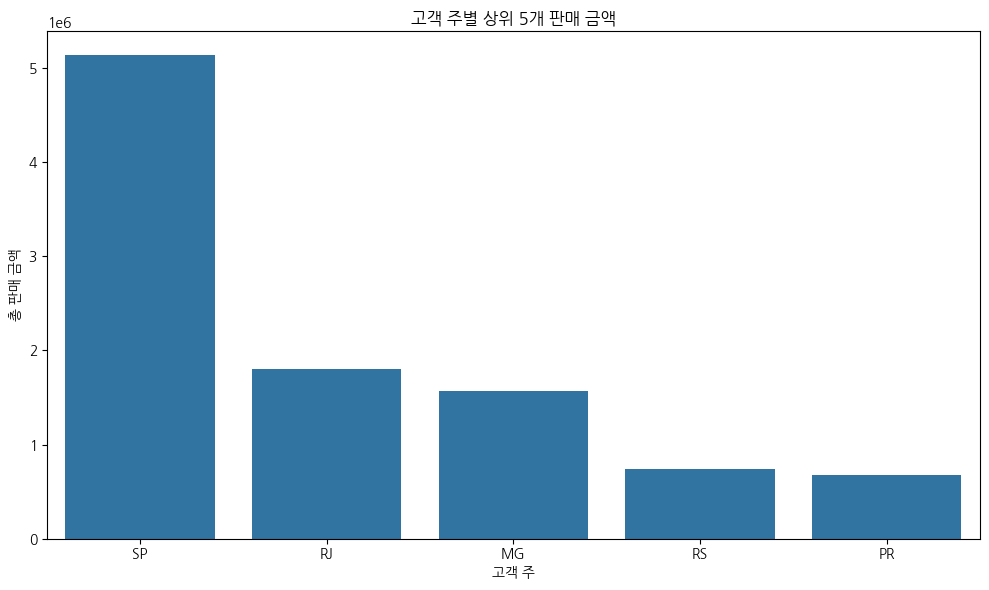

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 5 states by total sales
plt.figure(figsize=(10, 6))
sns.barplot(x='고객_주', y='상품_가격', data=top_5_states)

# Add title and labels
plt.title('고객 주별 상위 5개 판매 금액')
plt.xlabel('고객 주')
plt.ylabel('총 판매 금액')

# Show the plot
plt.tight_layout()
plt.show()

# 상위 고객 주 3개의 카테고리 분석
-> 가장 많이 팔린 카테고리 top10으로 정렬

In [16]:
states_to_filter = ['SP', 'MG', 'RJ']
df_filtered = df[df['고객_주'].isin(states_to_filter)]

display(df_filtered.head())
print(df_filtered.shape)

,주문_ID,고객_ID,주문상품_순번,상품_ID,판매자_ID,상품_가격,배송비,product_category_name,고객_고유ID,고객_우편번호앞자리,고객_도시,고객_주,판매자_우편번호앞자리,판매자_도시,판매자_주,상품_카테고리명(영어),상품카테고리
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,주방용품
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery,문구류
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,59.99,15.17,automotivo,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,12940,atibaia,SP,auto,자동차
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,149.99,19.77,moveis_escritorio,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,8577,itaquaquecetuba,SP,office_furniture,사무용 가구
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,ferramentas_jardim,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,29156,cariacica,ES,garden_tools,정원 도구


(74079, 17)


In [17]:
sales_by_state_category = df_filtered.groupby(['고객_주', '상품카테고리'])['상품_가격'].sum().reset_index()
sales_by_state_category.rename(columns={'상품_가격': '총_판매금액'}, inplace=True)
display(sales_by_state_category.head())

,고객_주,상품카테고리,총_판매금액
0,MG,DVD/블루레이,268.78
1,MG,가구/인테리어,78999.74
2,MG,가전제품,5814.42
3,MG,가전제품2,6535.78
4,MG,가정용품2,38.70


In [18]:
top_n = 10
top_categories_by_state = sales_by_state_category.groupby('고객_주').apply(lambda x: x.nlargest(top_n, '총_판매금액')).reset_index(drop=True)
display(top_categories_by_state.head())

/tmp/ipython-input-1174874540.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_state = sales_by_state_category.groupby('고객_주').apply(lambda x: x.nlargest(top_n, '총_판매금액')).reset_index(drop=True)


,고객_주,상품카테고리,총_판매금액
0,MG,건강/뷰티,157558.30
1,MG,침구/욕실/테이블,129643.98
2,MG,시계/선물,123759.23
3,MG,스포츠/레저,112719.19
4,MG,컴퓨터 액세서리,111069.74


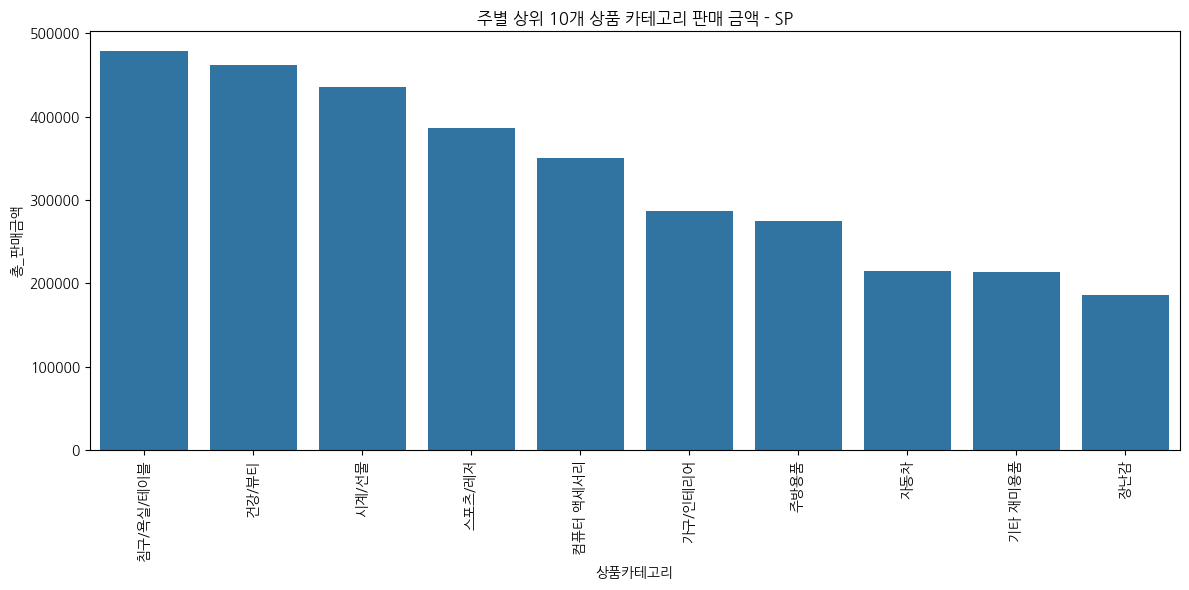

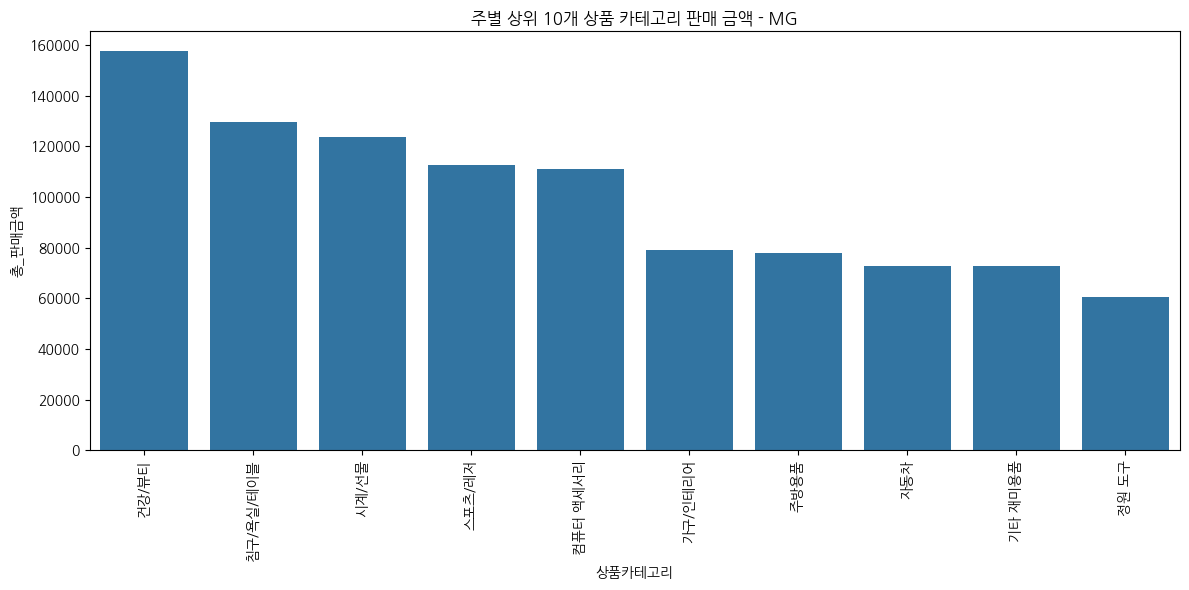

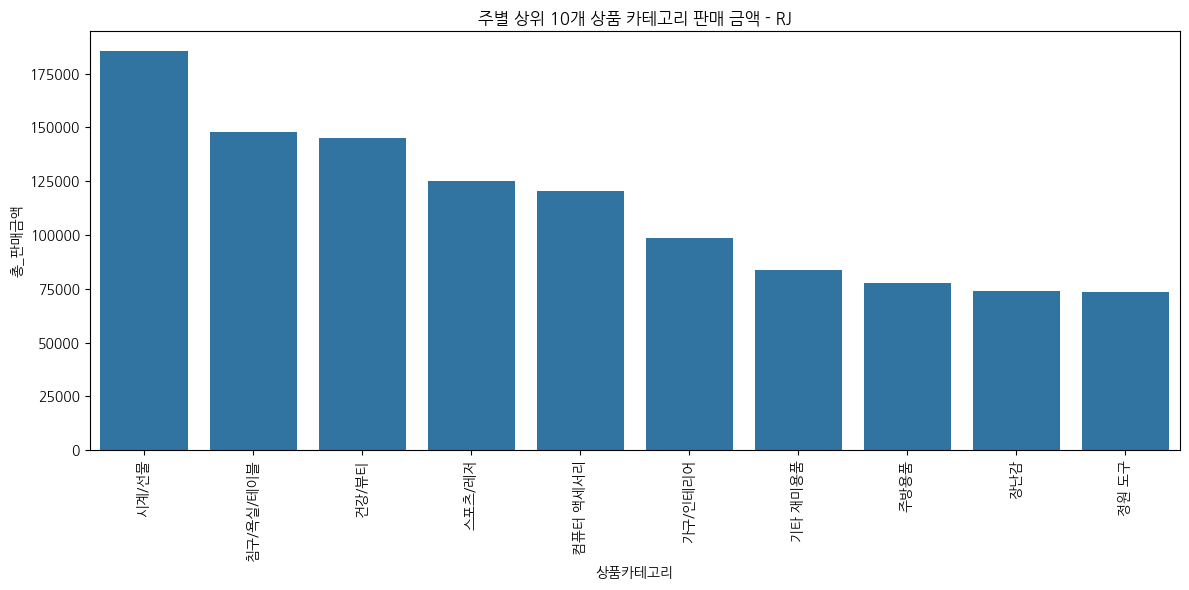

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for state in states_to_filter:
    # Filter data for the current state
    state_data = top_categories_by_state[top_categories_by_state['고객_주'] == state]

    # Create bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='상품카테고리', y='총_판매금액', data=state_data)

    # Set title and adjust layout
    plt.title(f'주별 상위 {top_n}개 상품 카테고리 판매 금액 - {state}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 요약:

### 데이터 분석 주요 결과

* SP, MG, RJ 세 주 모두에서 '침구/욕실/테이블' 카테고리가 가장 높은 판매량을 기록하여 폭넓은 인기를 보였습니다.
* SP, MG, RJ 전반에 걸쳐 공통적으로 높은 판매량을 보인 카테고리에는 '건강/뷰티', '스포츠/레저', '가구/인테리어'가 있습니다.
* '침구/욕실/테이블'은 모든 주에서 지배적이지만, SP 및 MG에 비해 RJ에서는 전체 판매량에서 차지하는 비중이 다소 낮았습니다.
* MG 주는 다른 두 주에 비해 '주방용품' 카테고리에서 상대적으로 더 강한 성과를 보였습니다.
* SP 및 RJ 주 모두 '컴퓨터 액세서리'가 최고 판매 카테고리에 포함되어 이 지역의 IT/전자 제품 수요를 시사합니다.

### 통찰 또는 다음 단계

* 세 주 모두에서 '침구/욕실/테이블', '건강/뷰티', '스포츠/레저'와 같이 꾸준히 높은 성과를 보이는 카테고리에 마케팅 및 재고 관리 전략을 집중합니다.
* MG에서 '주방용품', SP 및 RJ에서 '컴퓨터 액세서리'의 상대적으로 높은 판매량에 대한 이유를 조사하여 해당 주에 맞는 제품 제공 또는 판촉 활동을 맞춤화할 수 있습니다.

#판매자 주 상위 기준 판매금액 TOP5

In [20]:
# Group by '고객_주' and sum '상품_가격'
sales_by_state = df.groupby('고객_주')['상품_가격'].sum().reset_index()

# Sort by total sales in descending order and get the top 5
top_5_states = sales_by_state.sort_values(by='상품_가격', ascending=False).head(5)

# Display the result
display(top_5_states)

,고객_주,상품_가격
25,SP,5134217.15
18,RJ,1799848.18
10,MG,1565809.79
22,RS,740725.62
17,PR,674586.53


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 5 states by total sales
plt.figure(figsize=(10, 6))
sns.barplot(x='판매자_주', y='상품_가격', data=top_5_states)

# Add title and labels
plt.title('판매자 주별 상위 5개 판매 금액')
plt.xlabel('판매자 주')
plt.ylabel('총 판매 금액')

# Show the plot
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `판매자_주` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>